# Case 4 - Multiple Linear Regression_SLN

## Introduction
**Context.** You are a data analyst a recently launched prop-tech startup. And you have been asigned the task of identifying which features are importat when determining the price of a house.  

**Problem.** Your task is to build a model to predict the price of a house from the data set using all the provided information

**Analytical Context.** 
In previous days, the concept of machine learning has been defined as a group of techniques used to identify patterns relating features, classify new observations, predicting values and grouping observations. In this module we will explain a simple approach for regression problems, the linear regression.  

## Packages Import

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation

## Data Import

In [3]:
california_housing = fetch_california_housing()
df_california = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
df_california['Price']=pd.Series(california_housing.target*1000)
df_california = df_california[df_california['Price']<=4900]
df_california['MedInc']=df_california['MedInc']*1000
df_california.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8325.2,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4526.0
1,8301.4,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3585.0
2,7257.4,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3521.0


## Exploratory Data Analysis

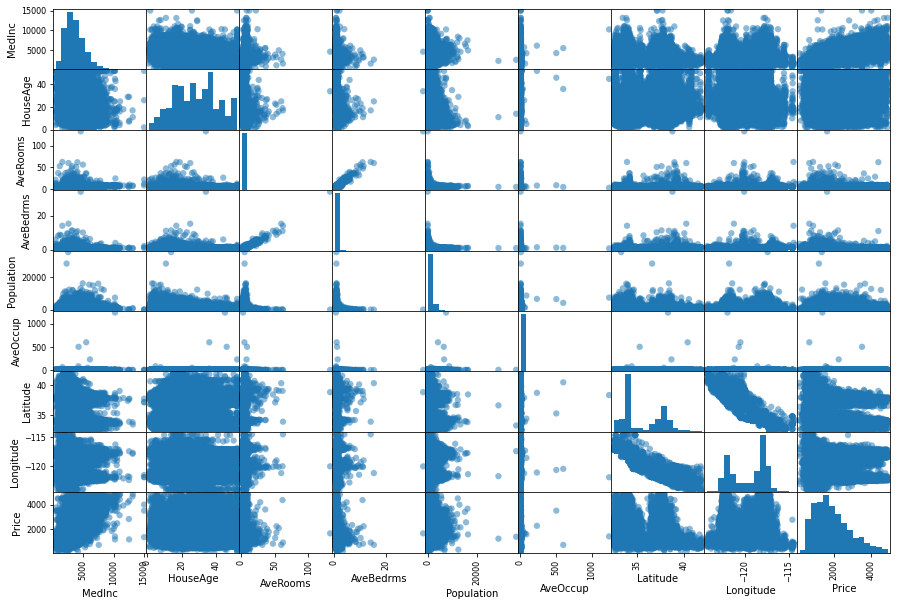

In [4]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_california, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,10), cmap=cmap)

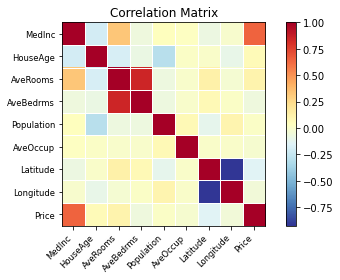

In [5]:
corr_mat = df_california.corr()
statsmodels.graphics.correlation.plot_corr(corr_mat,xnames=df_california.columns, ynames=df_california.columns);

## Multiple Lineal Regression

When using a simple linear regression, only one predictor is used in order to predict a response. However, in most cases a single predictor is not enough to predict a response. So, when there are multiple predictors that can be used to predict a response, better than fitting various simple linear regressions, you can fit a single multiple linear regression, which provides the best joint estimates for the coefficients of all of the predictors. In order to include all of the predictors in a single linear regression model, each one of them is given a different coefficient to be estimated. Keeping this in mind, the multiple linear regression assumes that the relationship between the response $Y$ and the multiple predictors $X_i$ is the following: <center> $Y=\beta_0+\beta_1X_1 +\beta_2X_2 + \dots + \beta_mX_m + \epsilon$ </center>

where $X_i$ refers to the $i^{th}$ predictor and $m$ is the number of predictors. In multiple linear regression models, the coefficient $\beta_i$ is interpreted as the amount $Y$ increases when $X_i$ increments in a unit, while everything else remains constant.  

The estimation for multiple linear regression models is based on the same concept used in simple linear regression models, minimizing the residual sum of squares. However, as now there are multiple input variables, the residual sum of squares is expressed as: <center>$RSS=\sum_{i=1}^{n}e_i^2=\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1}-\hat{\beta_2}x_{i2}-\dots-\hat{\beta_m}x_{im})^2$</center>

The graphic representation of the predictions made by using more than one predictor is now not a simple straight line, but a polytope defined by the number of estimated coefficients and their values. For example, the predicted values of a model in which $Y$ is explained by two predictors, $X_1$ and $X_2$, is shown graphically as a two-dimensional plane:

<figure>
<img src="/indu5012_case_4/fig/2-dim_Lin-Reg.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.1 - Estimations of a linear regression model with two predictors</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

Now, as there are multiple coefficients that have to be estimated in a multiple linear regression model, the calculations needed to obtain the best estimations for them are not as easy as in a simple linear regression model. First of all, let us define the model prediction as follows: <center> $f_\beta (X_i)= {\beta_0}+{\beta_1}x_{i1}+{\beta_2}x_{i2}+\dots+{\beta_m}x_{im}$ </center> 

then, the function to minimize can be written as: <center>$J(\beta)=\sum_{i=1}^{n}(y_i-f_\beta (X_i))^2$</center>

Now, this cost function can be written in matrix form. To do that, let us decompose the terms in the previous sum in the following vetors: <center>$J(\beta) = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix} -\begin{bmatrix}
           f_\beta (X_1) \\
           f_\beta (X_2) \\
           \vdots \\
           f_\beta (X_n)
         \end{bmatrix}  $ </center>

Furthermore, if the next $\beta$ vector is introduced: <center> $\beta=\begin{bmatrix}
           \beta_0 \\
           \beta_1 \\
           \vdots \\
           \beta_n
         \end{bmatrix}$ </center>

then, the cost function to be minimized can be expressed as the squared sum of the following expression: <center> $Y-X \beta$ </center>

The squared sum of that expression can be expressed in matrix form: <center> $J(\beta)=(Y-X \beta)^T(Y-X \beta)$ </center>

On that account, from now on the procedure to obtaining the estimates for the $\beta$ vector is the same as in a simple linear regression. First, the cost function's derivative with respect to $\beta$ is obtained: <center>$\frac{\delta J(\beta)}{\delta \beta}= 2X^TX\beta - 2X^T Y$ </center>

Finally, it is necessary to find the values of the coefficients that make this derivative to be equal to zero so that the values of the coefficients minimize the RSS: <center>$2X^TX\beta - 2X^T Y=0 \Rightarrow X^TX\beta  = X^T Y \Rightarrow \beta  = (X^TX)^{-1} X^T Y $ </center>

So, the estimates for any linear regression can be found with the expresion $(X^TX)^{-1} X^T Y$ where the matrix $X$ contains all of the values of the input variables seen in the observations used as training data with a column of ones added as the first column in the matrix (these column of ones corresponds to the values that multiply $\beta_0$). Therefore, the $X$ matrix in this formula is the following: <center>$\textbf{X} = \begin{bmatrix}
           1 & x_{11} & x_{12} & x_{13} & \dots & x_{1m}\\ 
           1 & x_{21} & x_{22} & x_{23} & \dots & x_{2m}\\
           \vdots \\
           1 & x_{n1} & x_{n2} & x_{n3} & \dots & x_{nm}\\
         \end{bmatrix}$ </center>







In [6]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df if not col==y])

print(formula_from_cols(df_california, "Price"))

est = smf.ols(formula_from_cols(df_california, "Price"), df_california).fit()
est.summary()

Price ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     3291.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:12:04   Log-Likelihood:            -1.5418e+05
No. Observations:               19609   AIC:                         3.084e+05
Df Residuals:                   19600   BIC:                         3.085e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.357e+04    591.526    -56.746      0.000   -3.47e+04   -3.24e+04
MedInc         0.4266      0.005     93.064      0.000       0.418       0.436
HouseAge       7.8517      0.406     19.323      0.000       7.055       8.648
AveRooms    -106.8455      5.619    -19.014      0.000    -117.860     -95.831
AveBedrms    595.1014     25.901     22.976      0.000     544.333     645.870
Population     0.0055      0.004      1.318      0.188      -0.003       0.014
AveOccup      -3.3786      0.424     -7.972      0.000      -4.209      -2.548
Latitude    -377.4214      6.474    -58.302      0.000    -390.110    -364.733
Longitude   -393.6942      6.778    -58.081      0.000    -406.980    -380.408
==============================================================================
Omnibus:                     3402.994   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9958.988
Skew:                           0.916   Prob(JB):                         0.00
Kurtosis:                       5.972   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Excercise 1

What variables are significant in the model?

**Answer**

### Excercise 2

Run the model again, but remove the non-significant variables. What can you conclude about it? Have the coefficients and the intercept changed? What about the $R^2$?

**Answer**

### Assesing model accuracy


#### F-statistic

As in multiple linear regression there are multiple predictors which relationship with the response has to be proven, the first question that has to be answere is if any of the predictors has a significant relationship with the response. In order to answer this question, the following hypothesis has to be tested: <center> $H_0: \beta_1=\beta_2=\dots=\beta_m=0$ </center>

versus the alternate hypothesis: <center> $H_a$: at least one $\beta_j$ is different from zero </center>

This hypothesis test can be made by the F statistic, which is calculated the following way:  <center> $F=\frac{ESS/m}{RSS/(n-m-1)}=\frac{(TSS-RSS)/m}{RSS/(n-m-1)}$ </center>

This statistic follows an F distribution, as the nominator and the denominator are $\chi^2$ variables divided by their degrees of freedom. Also, it is possible to demonstrate that: <center> $E[RSS/(n-m-1)]=\sigma^2$ </center> 

and that, if $H_0$ is true, <center> $E[ESS/(m)]=\sigma^2$ </center>

therefore, if the value of the statistic is close to 1, then $H_0$ might be true. However, when $H_0$ is not true $E[ESS/(m)]>\sigma^2$, so the F statistic will be greater than 1. 


#### Partial F-statistic
The F-statistic can be used not only to determine if all of the coefficients are equal to zero, but it also can be used in order to determine if multiple chosen coefficients are equal to zero. In order to test these hypothesis: <center> $H_0:$ All of the $q$ selected coefficients are equal to zero </center>  <center> $H_a:$ At least one of the $q$ selected coefficients is not equal to zero  </center>

the partial F-statistic can be computed by using the RSS of the model that has all of the coefficients and using the RSS of a second model that does not have the $q$ selected coefficients (the RSS for this second model will be noted as $RSS_0$). The statistic is calculated with the following equation: <center> $F=\frac{(RSS_0-RSS)/q}{RSS/(n-m-1)}$ </center>

Let us see how this statistic can be used:

In [7]:
est = smf.ols(formula_from_cols(df_california, "Price"), df_california).fit()
print(est.summary())

f_test1 = est.f_test('(MedInc = 0), (HouseAge = 0)')
print(f_test1)

f_test2 = est.f_test('(AveBedrms = 0), (AveOccup = 0)')
print(f_test2)

f_test2 = est.f_test('(Population = 0), (AveOccup = 0)')
print(f_test2)

f_test3 = est.f_test('(Population = 0)')
print(f_test3)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     3291.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:12:04   Log-Likelihood:            -1.5418e+05
No. Observations:               19609   AIC:                         3.084e+05
Df Residuals:                   19600   BIC:                         3.085e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.357e+04    591.526    -56.746      0.0

### $R^2$ and adjusted $R^2$

There is a problem in using the $R^2$ metric to measure how well the model fits the data is the fact that by introducing predictors to the model, the $R^2$ can only increase, as the worst thing that can happen when a new predictor is introduced is that its coefficient estimate is equal to zero, leaving the model the same as it was before including the predictor. Therefore, the $R^2$ metric will always favor including more information, even if it is not really relevant to predict the response that is wanted. 

To prevent this issue, the $R^2$ can be adjusted to penalize the irrelevant information that is taken into account in the model. The adjusted $R^2$ is calculated using the following equation: <center> $Adj. \space R^2= 1 - \frac{RSS/(n-m-1)}{TSS/(n-1)}$ </center>

This metric intends to penalize the addition of noisy variables as they will reduce the RSS ever so slightly while increasing the $m$ parameter, making the adjusted $R^2$ lower. 

### Excercise 3

Run the model with any four variables. Remove one, run the model again. Remove another one and run the model again. What changes can be seen in the values of $R^2$ and adjusted $R^2$. What can be concluded about it.


**Answer**

#### Residual Standard Error (RSE)

In a multiple linear regression model, the RSE is also used as the estimator of the standard deviation of the error. However, in a multiple linear regression model the way to calculate this RSE is different as the estimation of additional coefficients reduce the degrees of freedom: <center> $RSE=\sqrt{\frac{RSS}{(n-m-1)}}$ </center>  

This metric is still a quantification of the variability that the real values of the response will have around the created model. A lesser RSE is preferred as this means that the real values will be closer to the values predicted by the model.

## Qualitative (categorical) predictors 

Up until now all of the predictors have been assumed to be quantitative, i.e. that they have values that are measured in a scale. However, some of the predictors can also be quantitative, which means that they can take different values that correspond to one of many categories that might or might not be measured on a scale. For example, a marital status input variable can take the "single", "widow" and "married" categories.

Let us take an example where a linear regression model will be used to  the income of a person based on their marital status. In order to predict the income it is possible to use three <b> dummy variables </b> that can take one of two possible values: <center> $x_{i1} = \Bigg\{  \begin{matrix}
           1 \text{ if the } i^{th} \text{ person is married}\\ 
           0 \text{ otherwise} \\
         \end{matrix} $ </center> <center> $x_{i2} = \Bigg\{  \begin{matrix}
           1 \text{ if the } i^{th} \text{ person is single}\\ 
           0 \text{ otherwise} \\
         \end{matrix} $ </center> <center> $x_{i3} = \Bigg\{  \begin{matrix}
           1 \text{ if the } i^{th} \text{ person is widowed}\\ 
           0 \text{ otherwise} \\
         \end{matrix} $ </center>

However, if these three variables are introduced in the model, the coefficients cannot be estimated as the three variables are linearly dependent as $x_{i1}+x_{i2}+x_{i3}=1$. Therefore, only two of the variables will be used to introduce the relationship of this predictor with a persons's income. This model can be represented as: <center>$y_i=\beta_0+\beta_1x_{i1} +\beta_2x_{i2} =  \Bigg\{  \begin{matrix}
           y_i=\beta_0+\beta_1  \text{ if the } i^{th} \text{ person is married}\\ 
           y_i=\beta_0+\beta_2  \text{ if the } i^{th} \text{ person is single}\\
           y_i=\beta_0  \text{ if the } i^{th} \text{ person is widowed} \\
         \end{matrix} $ </center>

On that account, the $\beta_0$ parameters is equal to the average income for a widowed person, $\beta_1$ is equal to the average difference between married and widowed people and $\beta_2$ is the average difference between single and widowed people. In general, a categorical predictor will be represented with $c-1$ dummy variables, where $c$ is the number of categories in the categorical variable.


Before we can start the work on the model can be started, some adjustments must be made. In this case, considering the business situation (context) two variables: `AveRoom` and ÀveBdrms` can be converted into categorical variables by simply rounding the numbers to the nearest integer. 

In [8]:
df_california['AveRooms'] = round(df_california['AveRooms'])
df_california['AveBedrms'] = round(df_california['AveBedrms'])

df_california = df_california[df_california['AveRooms']<5]
df_california = df_california[df_california['AveBedrms']<5]

The model is run with the variable `AveRooms`

In [9]:
est = smf.ols('Price ~ C(AveRooms)', df_california).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.615
Date:                Wed, 02 Feb 2022   Prob (F-statistic):             0.0494
Time:                        15:12:05   Log-Likelihood:                -44036.
No. Observations:                5396   AIC:                         8.808e+04
Df Residuals:                    5392   BIC:                         8.811e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1638.8889    282.525      5.801      0.000    1085.026    2192.752
C(AveRooms)[T.2.0]   235.4511    290.877      0.809      0.418    -334.786     805.688
C(AveRooms)[T.3.0]   152.7340    283.807      0.538      0.590    -403.643     709.111
C(AveRooms)[T.4.0]    91.7330    282.824      0.324      0.746    -462.716     646.182
==============================================================================
Omnibus:                      744.552   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.235
Skew:                           0.998   Prob(JB):                    5.55e-244
Kurtosis:                       3.999   Cond. No.                         64.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be seen that the base model is `AveRooms`= 1 and, from there the coeficents for the other variables are calculated. 


In this case, the results shoiw that only when a house has 1 room, it has a significant effect over the price

### Excercise 4

Run a similar model, but with the variables `AveBedrms`. What can you conclude about it? What categories are significant in the model?



**Answer**

## Insurance Dataset

In order to have a better understanding of the Categorial Predictors, the **Insurance dataset** discused in previous classes can be used.

In [10]:
insurance = pd.read_csv('/work/indu5012_case_4/data/insurance_data.csv')
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Excercise 5

Run the model for each indidual varaible at a time for the variables: `sex`, `children`, `smoker` and `region` against `charges`. What can be concluded about it?

**Answer**

### Excercise 6

Run a model that includes the following variables: `sex`, `children`, `smoker` and `region` against `charges`. What can be concluded about it?

**Answer**

### Excercise 7
Run a model that includes the following variables: `age`, `bmi`, `sex`, `children`, `smoker` and `region` against `charges`. What can be concluded about it?

**Answer**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>